## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
%config InlineBackend.figure_format = 'svg'

## 2. Read data

In [2]:
alcohol_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')

## 3. Analyse data

### 3.1 Show first five values

In [3]:
alcohol_df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


### 3.2 Add continent to dataframe

In [4]:
# Get continent labels
continent_df = pd.read_csv('https://raw.githubusercontent.com/rvd-p/Alcohol-Consumption-Data-Analysis/main/sorted_continents.csv')

# Augment dataframe to include continent
alcohol_df['continent'] = continent_df[['continent']]

display(alcohol_df.head())
display(alcohol_df.tail())

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
192,Zimbabwe,64,18,4,4.7,Africa


### 3.3 Wine consumption by continent 

In [5]:
# Select relevant columns
df_wine_group  = alcohol_df[['wine_servings','continent']]

# Use groupby method to get wine servings per continent
df_grouped     = df_wine_group.groupby(['continent'], as_index = False)
df_grouped_sum = df_wine_group.groupby(['continent'], as_index = False).sum()
df_grouped_av  = df_wine_group.groupby(['continent'], as_index = False).mean()

# Average number of wine servings per continent
print('Average wine servings per continent')
display(df_grouped_av.head())

# Total wine servings per continent
print('Total wine servings per continent')
display(df_grouped_sum.head())

Average wine servings per continent


,continent,wine_servings
0,Africa,16.264151
1,Asia,9.068182
2,Europe,142.222222
3,North America,24.521739
4,Oceania,35.625000


Total wine servings per continent


,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570


### 3.4 Beer consumption summary

In [6]:
# Dataframe containing beer data for each continent
df_beer        = alcohol_df[['beer_servings','continent']]

# Group by continent
df_beer_group  = df_beer.groupby(['continent'], as_index = True)

# Display statistical summary
beer_summary   = df_beer_group.describe()
display(beer_summary)

# Useful index
max_value      = alcohol_df['beer_servings'].max()
max_index      = alcohol_df[alcohol_df['beer_servings'] == max_value].index.values 
print(alcohol_df['country'].iloc[max_index[0]], 'in', alcohol_df['continent'].iloc[max_index[0]], 
                                                       'consumes the most beer in the world. \n')

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                              
                  75%    max  
continent                     
Africa          76.00  376.0  
Asia            60.50  247.0  
Europe         270.00  361.0  
North America  198.00  285.0  
Oceania        125.75  306.0  
South America  198.00  333.0

Namibia in Africa consumes the most beer in the world. 



### 3.5 Beer consumption boxplot

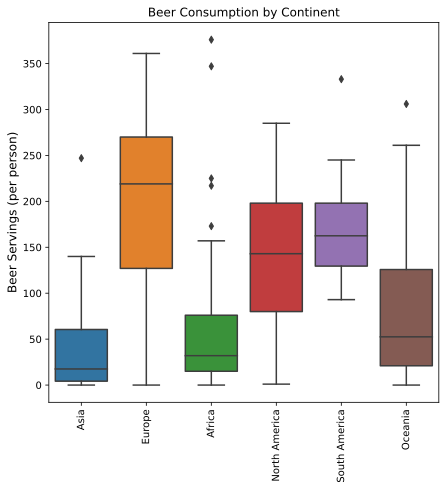

In [7]:
# Boxplot
plt.figure(figsize=(7,7))
beer_plot = sbn.boxplot(x='continent',y='beer_servings',data = alcohol_df)

# Set labels, title, tidy up, and show plot
plt.xlabel('') # xlabel removed as it's not really necessary for this plot.
plt.ylabel('Beer Servings (per person)', size = 12)
plt.xticks(rotation = 90)
plt.title('Beer Consumption by Continent', size = 12)
plt.show()

### 3.6 Wine-beer correlation plot

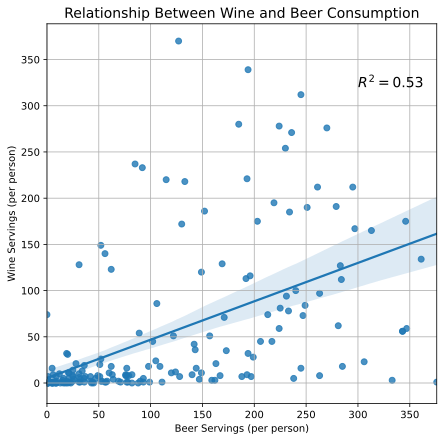

The p-value is : 3.378401743961718e-15


In [8]:
pearson_coeff, p_value = stats.pearsonr(alcohol_df['beer_servings'],alcohol_df['wine_servings'])

# Wine-Beer regression plot
plt.figure(figsize=(7,7))
wine_beer_corr_plot =  sbn.regplot(x='beer_servings', y='wine_servings', data = alcohol_df)

# Set axis labels
plt.xlabel('Beer Servings (per person)', size = 10)
plt.ylabel('Wine Servings (per person)', size = 10)
plt.title('Relationship Between Wine and Beer Consumption', size = 14)
plt.text(300, 320, r'$R^2 = %0.2f$' % pearson_coeff, size = 14)
plt.grid()
plt.show()

# Print p-value
print('The p-value is :', p_value)

### 3.7 Total consumption of alcohol vs wine servings regression

In [9]:
# Create lm object
lm = LinearRegression()

# Specify X and Y variables
x_wine    = alcohol_df[['wine_servings']]
y_alcohol = alcohol_df[['total_litres_of_pure_alcohol']]

# Fit linear regression model
lm.fit(x_wine,y_alcohol)

# Obtain R-squared value
print('The R-squared value is : ', lm.score(x_wine, y_alcohol))

The R-squared value is :  0.44568754597876037


### 3.8 Regression using train-test split

In [10]:
# Create new linear regression object
lmm = LinearRegression()

# Get numerical data from dataframe
df_numeric = alcohol_df._get_numeric_data()

# Specify x and y data
y_data = df_numeric[['total_litres_of_pure_alcohol']]
x_data = df_numeric.drop('total_litres_of_pure_alcohol',axis=1)

# Split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=0)

# Fit data
lmm.fit(x_train,y_train)

# R-squared value on test data
print('The R-squared value on the test data is : ', lmm.score(x_test,y_test))

The R-squared value on the test data is :  0.6990304512837944


### 3.9 Fit using pipeline

In [11]:
# Pipeline input
dummy_input    = [('scale',StandardScaler()), 
                           ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

# Pipeline object 
dummy_pipe     = Pipeline(dummy_input) 

# Transform data and carry out fitting
dummy_pipe.fit(x_train,y_train)

# Compute R-squared value
print('The R-squared value on the test data is :', dummy_pipe.score(x_test,y_test))

The R-squared value on the test data is : 0.7076376133886035


### 3.10 Ridge regression

In [12]:
# Create ridge regression object
alpha_value = 0.1
ridge_model = Ridge(alpha = alpha_value)

# Fit train data
ridge_model.fit(x_train,y_train)

# Score using test data
print('The R-squared value on the test data using ridge regression is :', ridge_model.score(x_test,y_test))

The R-squared value on the test data using ridge regression is : 0.6990304549019178


### 3.11 Regression using polynomial features

In [13]:
# Create polynomial features object
poly_degree      = 2
poly_regression  = PolynomialFeatures(degree = poly_degree)

# Transform test and train data
x_train_poly     = poly_regression.fit_transform(x_train)
x_test_poly      = poly_regression.fit_transform(x_test)

# Create polynomial ridge regression object
alpha_value      = 0.1
poly_ridge_model = Ridge(alpha = alpha_value)

# Fit polynomial ridge model on train data
poly_ridge_model.fit(x_train_poly, y_train)

# Obtain R-squared value using test data
print('The R-squared value on the test data using ridge regression with second order polynomials is :', 
                                                                             poly_ridge_model.score(x_test_poly, y_test))

The R-squared value on the test data using ridge regression with second order polynomials is : 0.7076376228095798
